<a href="https://colab.research.google.com/github/Tushar1000x/Image_processing/blob/main/Prml_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

values of X choosen
[0.00000000e+00 1.50015002e-03 3.00030003e-03 ... 1.49969997e+01
 1.49984998e+01 1.50000000e+01]
values of p_x_given_omega1
[1.02818600e-03 1.03161883e-03 1.03506209e-03 ... 6.02033452e-11
 5.98033743e-11 5.94060012e-11]
values of p_x_given_omega2
[6.69151129e-05 6.71161609e-05 6.73177751e-05 ... 4.38637900e-04
 4.37488240e-04 4.36341348e-04]


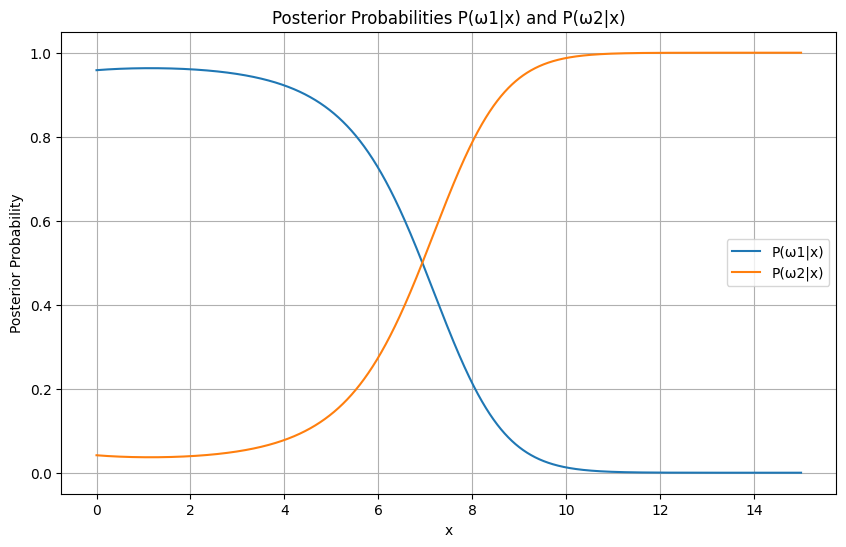

In [ ]:
#Q1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the priors
P_omega1 = 0.6
P_omega2 = 0.4

# Gaussian distribution parameters for each class
mu1, sigma1 = 5, 1.5
mu2, sigma2 = 8, 2.0

# Generate x values from 0 to 15
x_values = np.linspace(0, 15, 100)
print("values of X choosen")
print(x_values)

# Calculate class-conditional probabilities for each x
p_x_given_omega1 = norm.pdf(x_values, mu1, sigma1)
p_x_given_omega2 = norm.pdf(x_values, mu2, sigma2)
print("values of p_x_given_omega1")
print(p_x_given_omega1)
print("values of p_x_given_omega2")
print(p_x_given_omega2)

# Calculate the marginal probability P(x)
P_x = p_x_given_omega1 * P_omega1 + p_x_given_omega2 * P_omega2

# Calculate posterior probabilities using Bayes' Theorem
P_omega1_given_x = (p_x_given_omega1 * P_omega1) / P_x
P_omega2_given_x = (p_x_given_omega2 * P_omega2) / P_x

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, P_omega1_given_x, label='P(ω1|x)')
plt.plot(x_values, P_omega2_given_x, label='P(ω2|x)')
plt.title('Posterior Probabilities P(ω1|x) and P(ω2|x)')
plt.xlabel('x')
plt.ylabel('Posterior Probability')
plt.legend()
plt.grid(True)
plt.show()


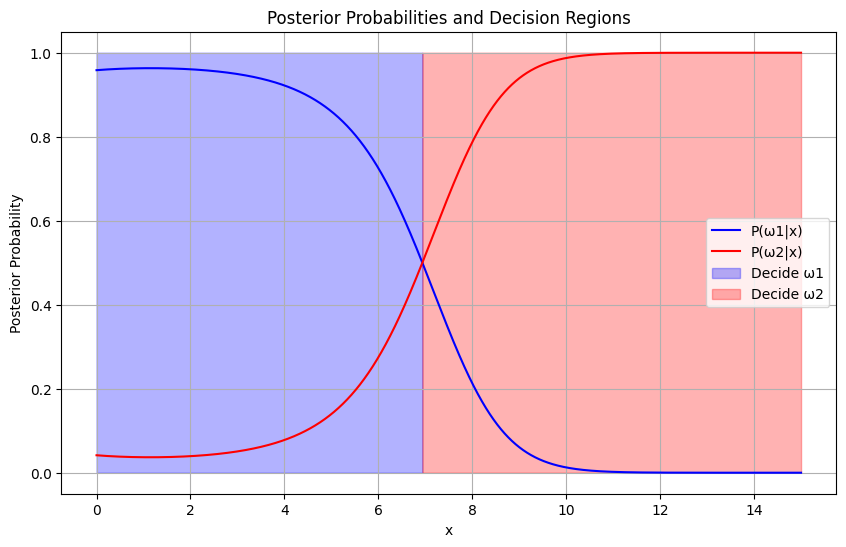

In [ ]:
decision = P_omega1_given_x > P_omega2_given_x

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, P_omega1_given_x, label='P(ω1|x)', color='blue')
plt.plot(x_values, P_omega2_given_x, label='P(ω2|x)', color='red')
plt.fill_between(x_values, 0, 1, where=decision, color='blue', alpha=0.3, label='Decide ω1') # true decision
plt.fill_between(x_values, 0, 1, where=~decision, color='red', alpha=0.3, label='Decide ω2') # false decision
plt.title('Posterior Probabilities and Decision Regions')
plt.xlabel('x')
plt.ylabel('Posterior Probability')
plt.legend()
plt.grid(True)
plt.show()

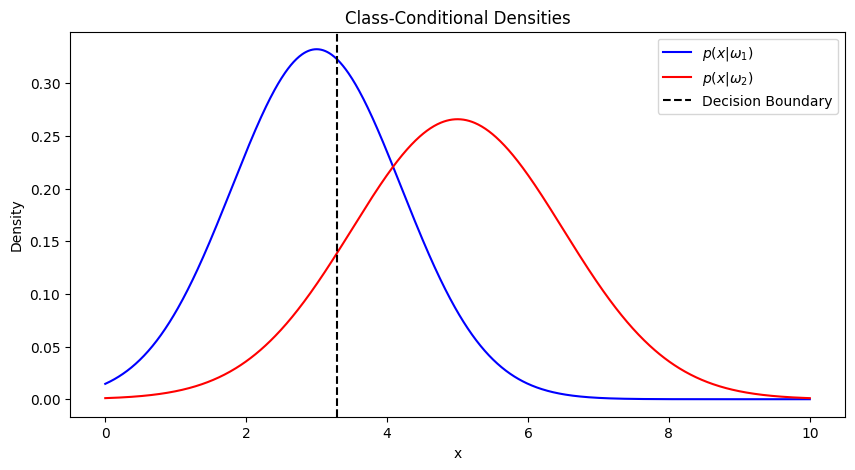

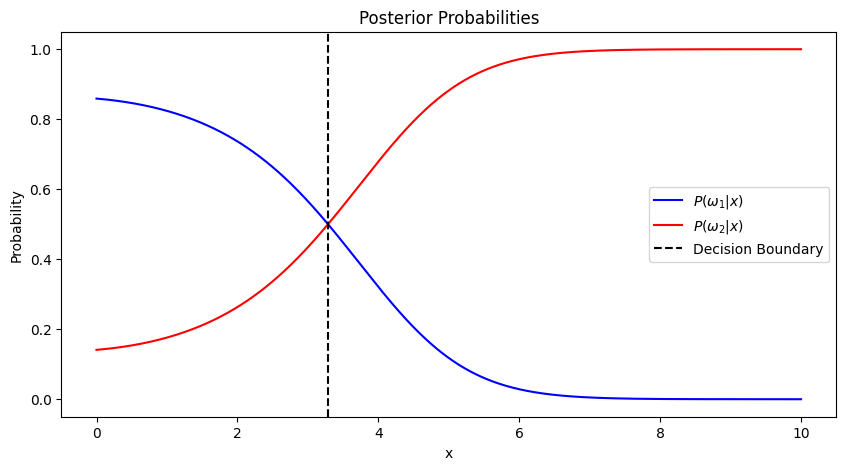

Decision Boundary: x = 3.28
Initial Misclassification Rate: 0.2104
Misclassification Rate after shifting boundary by 0.5: 0.2231


In [ ]:
#Q2.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def posterior_probabilities(x, priors, means, stds):
    """Compute posterior probabilities P(wi|x) using Bayes' Theorem."""
    p_x_given_w1 = norm.pdf(x, means[0], stds[0])
    p_x_given_w2 = norm.pdf(x, means[1], stds[1])

    p_x = p_x_given_w1 * priors[0] + p_x_given_w2 * priors[1]

    P_w1_given_x = (p_x_given_w1 * priors[0]) / p_x
    P_w2_given_x = (p_x_given_w2 * priors[1]) / p_x

    return P_w1_given_x, P_w2_given_x

def decision_boundary(priors, means, stds):
    """Find decision boundary where P(w1|x) = P(w2|x)."""
    x_vals = np.linspace(0, 10, 1000)
    P_w1_given_x, P_w2_given_x = posterior_probabilities(x_vals, priors, means, stds)

    idx = np.argmin(np.abs(P_w1_given_x - P_w2_given_x))  # Find closest point
    return x_vals[idx]

# Given data
priors = [0.3, 0.7]
means = [3, 5]
stds = [1.2, 1.5]
x = np.linspace(0, 10, 1000)

# Compute class-conditional densities
p_x_given_w1 = norm.pdf(x, means[0], stds[0])
p_x_given_w2 = norm.pdf(x, means[1], stds[1])

# Compute posterior probabilities
P_w1_given_x, P_w2_given_x = posterior_probabilities(x, priors, means, stds)

# Find decision boundary
boundary = decision_boundary(priors, means, stds)

# Plot class-conditional densities
plt.figure(figsize=(10, 5))
plt.plot(x, p_x_given_w1, label=r'$p(x|\omega_1)$', color='blue')
plt.plot(x, p_x_given_w2, label=r'$p(x|\omega_2)$', color='red')
plt.axvline(boundary, color='black', linestyle='--', label='Decision Boundary')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Class-Conditional Densities')
plt.show()

# Plot posterior probabilities
plt.figure(figsize=(10, 5))
plt.plot(x, P_w1_given_x, label=r'$P(\omega_1|x)$', color='blue')
plt.plot(x, P_w2_given_x, label=r'$P(\omega_2|x)$', color='red')
plt.axvline(boundary, color='black', linestyle='--', label='Decision Boundary')
plt.legend()
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Posterior Probabilities')
plt.show()

print(f"Decision Boundary: x = {boundary:.2f}")

import scipy.integrate as integrate

def misclassification_rate(boundary, priors, means, stds, shift=0):
    """Compute the misclassification rate given a decision boundary shift."""
    new_boundary = boundary + shift  # Shift the boundary slightly

    # Compute misclassification probabilities
    P_error_w1, _ = integrate.quad(lambda x: norm.pdf(x, means[0], stds[0]) * priors[0], new_boundary, np.inf)
    P_error_w2, _ = integrate.quad(lambda x: norm.pdf(x, means[1], stds[1]) * priors[1], -np.inf, new_boundary)

    total_error = P_error_w1 + P_error_w2
    return total_error

# Compute initial misclassification rate
initial_error = misclassification_rate(boundary, priors, means, stds)

# Compute misclassification rate for a small shift
shift_amount = 0.5  # Adjust this value for different shifts
shifted_error = misclassification_rate(boundary, priors, means, stds, shift=shift_amount)

print(f"Initial Misclassification Rate: {initial_error:.4f}")
print(f"Misclassification Rate after shifting boundary by {shift_amount}: {shifted_error:.4f}")

Decision boundary occurs at x = 74.41


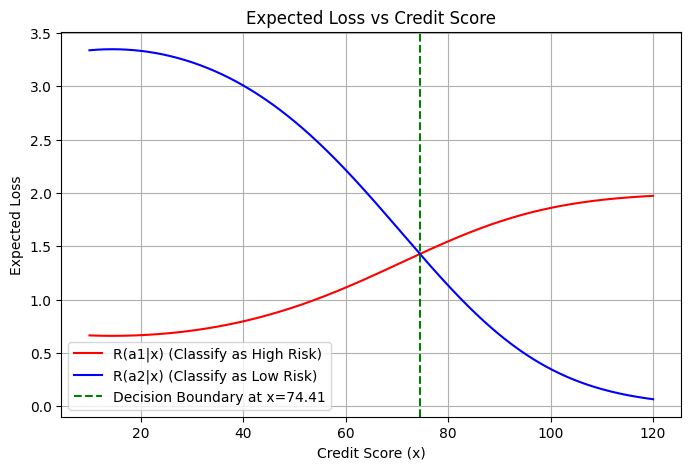

Decision boundary for P(w1)=0.4: x = 74.41


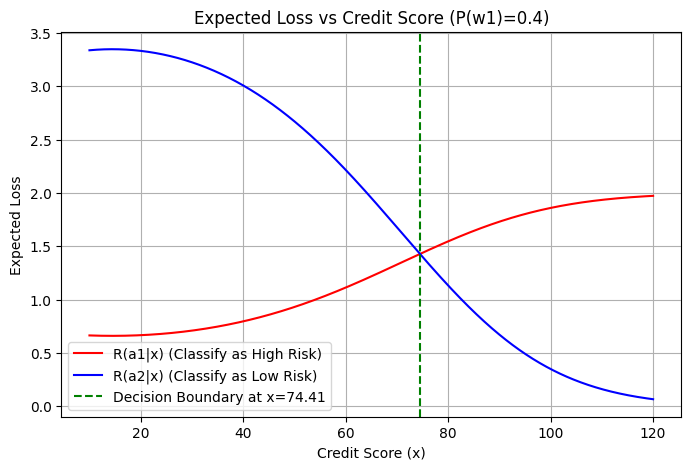

Decision boundary for P(w1)=0.6: x = 87.96


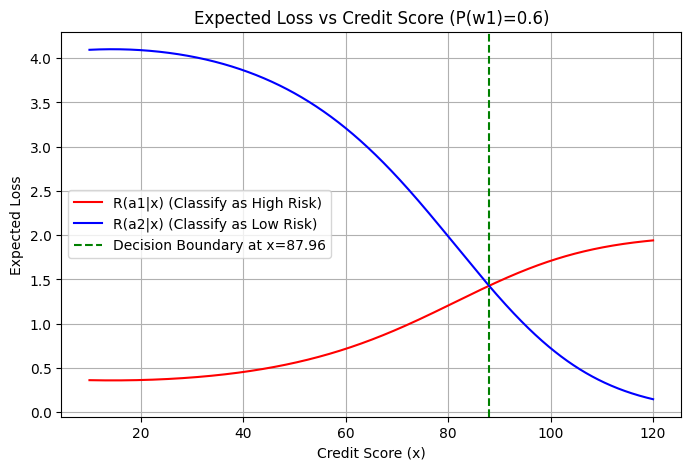

Decision boundary for P(w1)=0.8: x = 101.50


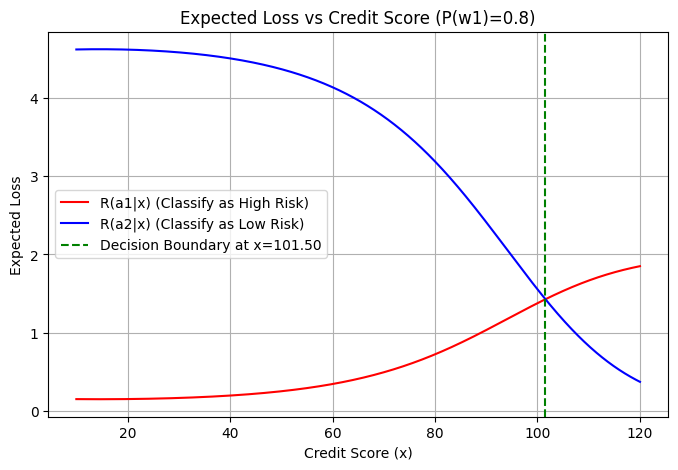

In [ ]:
#Q.3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def posterior_probabilities(x):
    # Given probabilities
    P_w1 = 0.4  # Prior for high risk
    P_w2 = 0.6  # Prior for low risk

    # Likelihoods (Gaussian distributions)
    p_x_w1 = norm.pdf(x, loc=50, scale=20)  # High risk distribution
    p_x_w2 = norm.pdf(x, loc=70, scale=25)  # Low risk distribution

    # Compute posteriors using Bayes' rule
    p_x = p_x_w1 * P_w1 + p_x_w2 * P_w2
    P_w1_x = (p_x_w1 * P_w1) / p_x
    P_w2_x = (p_x_w2 * P_w2) / p_x

    return P_w1_x, P_w2_x

def expected_loss(x):
    P_w1_x, P_w2_x = posterior_probabilities(x)


#Nanaware Rituja Ramakant 2024PCS0124

    # Loss values from table
    loss_a1_w1 = 0  # Classifying as High Risk when actually High Risk
    loss_a1_w2 = 2  # Classifying as High Risk when actually Low Risk
    loss_a2_w1 = 5  # Classifying as Low Risk when actually High Risk
    loss_a2_w2 = 0  # Classifying as Low Risk when actually Low Risk

    # Expected loss calculations
    R_a1_x = loss_a1_w1 * P_w1_x + loss_a1_w2 * P_w2_x
    R_a2_x = loss_a2_w1 * P_w1_x + loss_a2_w2 * P_w2_x

    return R_a1_x, R_a2_x

def find_decision_boundary():
    x_values = np.linspace(10, 120, 1000)
    for x in x_values:
        R_a1_x, R_a2_x = expected_loss(x)
        if np.isclose(R_a1_x, R_a2_x, atol=0.01):
            return x
    return None

def plot_expected_loss():
    x_values = np.linspace(10, 120, 1000)
    R_a1_values, R_a2_values = [], []

    for x in x_values:
        R_a1_x, R_a2_x = expected_loss(x)
        R_a1_values.append(R_a1_x)
        R_a2_values.append(R_a2_x)

    plt.figure(figsize=(8, 5))
    plt.plot(x_values, R_a1_values, label="R(a1|x) (Classify as High Risk)", color='red')
    plt.plot(x_values, R_a2_values, label="R(a2|x) (Classify as Low Risk)", color='blue')

    decision_boundary = find_decision_boundary()
    if decision_boundary:
        plt.axvline(x=decision_boundary, color='green', linestyle='--', label=f'Decision Boundary at x={decision_boundary:.2f}')

    plt.xlabel("Credit Score (x)")
    plt.ylabel("Expected Loss")
    plt.title("Expected Loss vs Credit Score")
    plt.legend()
    plt.grid()
    plt.show()

# Run computations
boundary = find_decision_boundary()
print(f"Decision boundary occurs at x = {boundary:.2f}")
plot_expected_loss()

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def posterior_probabilities(x, P_w1):
    P_w2 = 1 - P_w1  # Adjusted prior for low risk

    p_x_w1 = norm.pdf(x, loc=50, scale=20)
    p_x_w2 = norm.pdf(x, loc=70, scale=25)

    p_x = p_x_w1 * P_w1 + p_x_w2 * P_w2
    P_w1_x = (p_x_w1 * P_w1) / p_x
    P_w2_x = (p_x_w2 * P_w2) / p_x

    return P_w1_x, P_w2_x

def expected_loss(x, P_w1):
    P_w1_x, P_w2_x = posterior_probabilities(x, P_w1)

    loss_a1_w1 = 0
    loss_a1_w2 = 2
    loss_a2_w1 = 5
    loss_a2_w2 = 0

    R_a1_x = loss_a1_w1 * P_w1_x + loss_a1_w2 * P_w2_x
    R_a2_x = loss_a2_w1 * P_w1_x + loss_a2_w2 * P_w2_x

    return R_a1_x, R_a2_x

def find_decision_boundary(P_w1):
    x_values = np.linspace(10, 120, 1000)
    for x in x_values:
        R_a1_x, R_a2_x = expected_loss(x, P_w1)
        if np.isclose(R_a1_x, R_a2_x, atol=0.01):
            return x
    return None

def plot_expected_loss(P_w1):
    x_values = np.linspace(10, 120, 1000)
    R_a1_values, R_a2_values = [], []

    for x in x_values:
        R_a1_x, R_a2_x = expected_loss(x, P_w1)
        R_a1_values.append(R_a1_x)
        R_a2_values.append(R_a2_x)

    plt.figure(figsize=(8, 5))
    plt.plot(x_values, R_a1_values, label="R(a1|x) (Classify as High Risk)", color='red')
    plt.plot(x_values, R_a2_values, label="R(a2|x) (Classify as Low Risk)", color='blue')

    decision_boundary = find_decision_boundary(P_w1)
    if decision_boundary:
        plt.axvline(x=decision_boundary, color='green', linestyle='--', label=f'Decision Boundary at x={decision_boundary:.2f}')

    plt.xlabel("Credit Score (x)")
    plt.ylabel("Expected Loss")
    plt.title(f"Expected Loss vs Credit Score (P(w1)={P_w1})")
    plt.legend()
    plt.grid()
    plt.show()

# Run computations with different priors
priors = [0.4, 0.6, 0.8]  # Different prior probabilities for high-risk
for P_w1 in priors:
    boundary = find_decision_boundary(P_w1)
    print(f"Decision boundary for P(w1)={P_w1}: x = {boundary:.2f}")
    plot_expected_loss(P_w1)


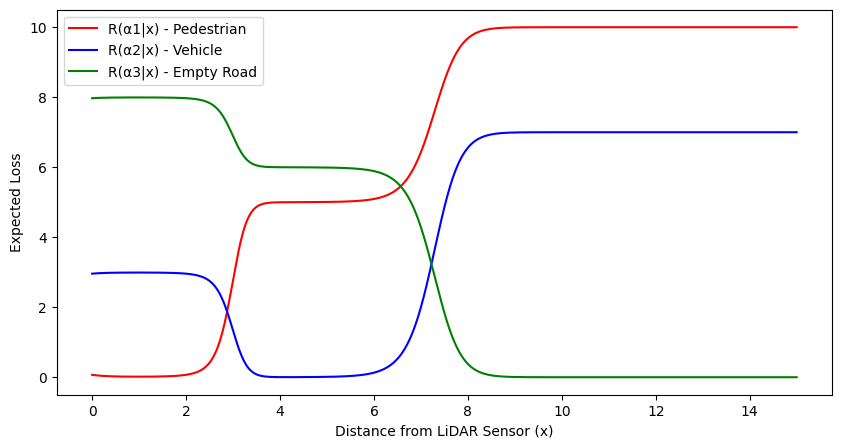

In [ ]:
## Q.4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given values
priors = [0.2, 0.5, 0.3]
means = [2, 5, 10]
stds = [0.5, 1.0, 1.5]
loss_matrix = np.array([[0, 5, 10], [3, 0, 7], [8, 6, 0]])
x_values = np.linspace(0, 15, 1000)

def class_conditional_pdf(x, mean, std):
    return norm.pdf(x, mean, std)

def posterior_probability(x, prior, mean, std, evidence):
    return (class_conditional_pdf(x, mean, std) * prior) / evidence

def compute_expected_loss(x_values, priors, means, stds, loss_matrix):
    class_pdfs = [class_conditional_pdf(x_values, mean, std) for mean, std in zip(means, stds)]
    evidence = sum(prior * pdf for prior, pdf in zip(priors, class_pdfs))
    posteriors = [(prior * pdf) / evidence for prior, pdf in zip(priors, class_pdfs)]

    expected_losses = [sum(loss_matrix[i, j] * posteriors[j] for j in range(len(priors))) for i in range(len(priors))]
    expected_losses = np.array(expected_losses)
    optimal_decision_indices = np.argmin(expected_losses, axis=0)

    return expected_losses, optimal_decision_indices

expected_losses, optimal_decision_indices = compute_expected_loss(x_values, priors, means, stds, loss_matrix)

# Plot decision boundaries
plt.figure(figsize=(10, 5))
plt.plot(x_values, expected_losses[0], label='R(α1|x) - Pedestrian', color='red')
plt.plot(x_values, expected_losses[1], label='R(α2|x) - Vehicle', color='blue')
plt.plot(x_values, expected_losses[2], label='R(α3|x) - Empty Road', color='green')

# for i in range(1, len(x_values)):
#     if optimal_decision_indices[i] != optimal_decision_indices[i - 1]:
#         plt.axvline(x_values[i], color='black', linestyle='--')

plt.xlabel('Distance from LiDAR Sensor (x)')
plt.ylabel('Expected Loss')
plt.legend()
# plt.title('Expected Loss and Decision Boundaries')
plt.show()




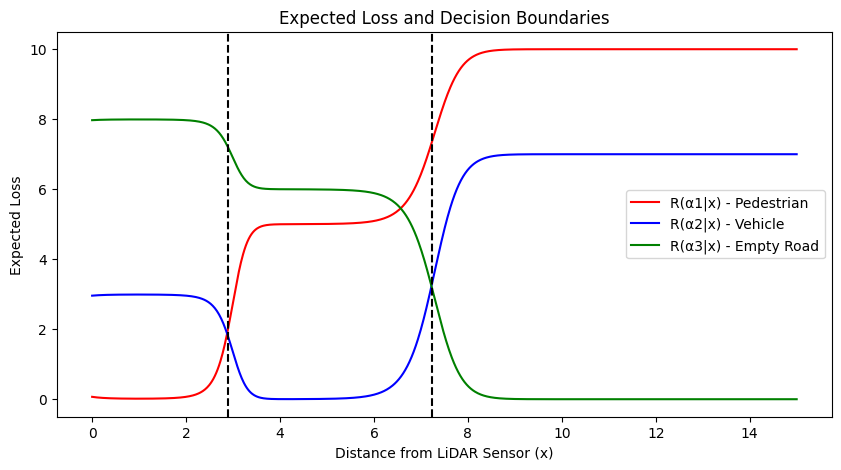

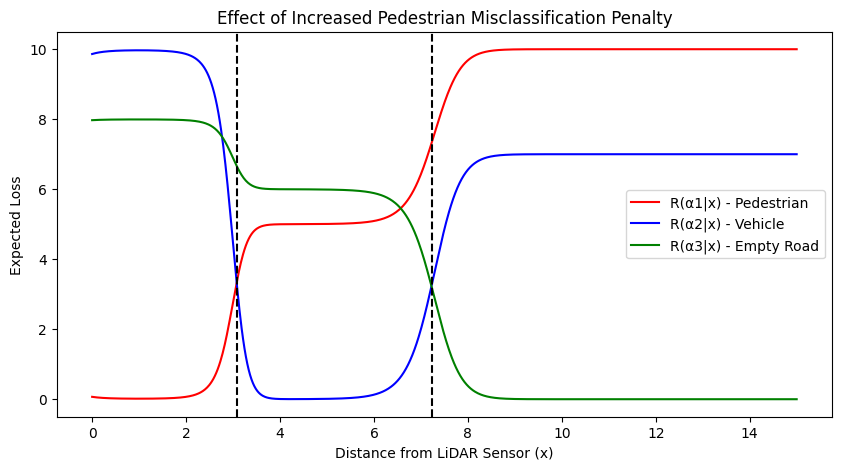

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(10, 5))
plt.plot(x_values, expected_losses[0], label='R(α1|x) - Pedestrian', color='red')
plt.plot(x_values, expected_losses[1], label='R(α2|x) - Vehicle', color='blue')
plt.plot(x_values, expected_losses[2], label='R(α3|x) - Empty Road', color='green')

for i in range(1, len(x_values)):
    if optimal_decision_indices[i] != optimal_decision_indices[i - 1]:
        plt.axvline(x_values[i], color='black', linestyle='--')

plt.xlabel('Distance from LiDAR Sensor (x)')
plt.ylabel('Expected Loss')
plt.legend()
plt.title('Expected Loss and Decision Boundaries')
plt.show()

# Effect of increasing pedestrian misclassification penalty
loss_matrix[1, 0] = 10  # Increased penalty for misclassifying pedestrian as vehicle
expected_losses_new, optimal_decision_indices_new = compute_expected_loss(x_values, priors, means, stds, loss_matrix)

plt.figure(figsize=(10, 5))
plt.plot(x_values, expected_losses_new[0], label='R(α1|x) - Pedestrian', color='red')
plt.plot(x_values, expected_losses_new[1], label='R(α2|x) - Vehicle', color='blue')
plt.plot(x_values, expected_losses_new[2], label='R(α3|x) - Empty Road', color='green')

for i in range(1, len(x_values)):
    if optimal_decision_indices_new[i] != optimal_decision_indices_new[i - 1]:
        plt.axvline(x_values[i], color='black', linestyle='--')

plt.xlabel('Distance from LiDAR Sensor (x)')
plt.ylabel('Expected Loss')
plt.legend()
plt.title('Effect of Increased Pedestrian Misclassification Penalty')
plt.show()
